In [63]:
# %load_ext autoreload
# %autoreload 2
%reload_ext autoreload

# ---- Make sure Python can find your 'scripts' folder ----
import sys, os
from pathlib import Path
import matplotlib.pyplot as plt
# Start at the current notebook folder and walk up a few levels
here = Path.cwd()
root = here
for _ in range(5):
    if (root / "scripts" / "wrangle.py").exists():
        # Add BOTH the project root and the scripts folder to sys.path
        sys.path.insert(0, str(root))
        sys.path.insert(0, str(root / "scripts"))
        break
    root = root.parent

print("Detected project root:", root)
print("wrangle.py exists:", (root / "scripts" / "wrangle.py").exists())

# import should work
import importlib, scripts.wrangle as wr


Detected project root: c:\Users\Okoko\Desktop\DATA ANALYSIS PROJECT\World_quant_university\BuenosAires_Apartment_Project
wrangle.py exists: True


In [64]:
df = wr.wrangle('./../data/buenos-aires-real-estate-1.csv')
df

<string>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.60,129000.00,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.80,87000.00,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.20,118000.00,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.80,57000.00,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.00,90000.00,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8589,sell,apartment,|Argentina|Capital Federal|Barracas|,"-34.631591,-58.370191",1118100.0,ARS,1114996.65,73536.95,49.0,42.0,1500.754082,26621.428570,3.0,1.0,NaN,http://barracas.properati.com.ar/npf1_venta_de...
8590,sell,apartment,|Argentina|Capital Federal|Almagro|,"-34.6045547,-58.4182063",119000.0,USD,1804325.60,119000.00,46.0,41.0,2586.956522,2902.439024,NaN,NaN,NaN,http://almagro.properati.com.ar/ea4d_venta_dep...
8593,sell,apartment,|Argentina|Capital Federal|Barracas|,"-34.6240024,-58.3905883",62000.0,USD,940068.80,62000.00,NaN,43.0,NaN,1441.860465,NaN,2.0,NaN,http://barracas.properati.com.ar/oc61_venta_de...
8601,sell,apartment,|Argentina|Capital Federal|San Nicolás|,"-34.601455,-58.378132",125000.0,USD,1895300.00,125000.00,NaN,70.0,NaN,1785.714286,2.0,3.0,NaN,http://san-nicolas.properati.com.ar/1004t_vent...


In [65]:
#sanity check for conditons
#property type is apartment
df['property_type'].unique()

array(['apartment'], dtype=object)

In [ ]:
#check that apartment are in capital federal
df['place_with_parent_names'].str.contains('Capital Federal')


0       True
4       True
9       True
11      True
20      True
        ... 
8589    True
8590    True
8593    True
8601    True
8604    True
Name: place_with_parent_names, Length: 1781, dtype: bool

In [55]:
# check price are not above 400,000
df['price_aprox_usd'] < 400_000

0       True
4       True
9       True
11      True
20      True
        ... 
8589    True
8590    True
8593    True
8601    True
8604    True
Name: price_aprox_usd, Length: 1781, dtype: bool

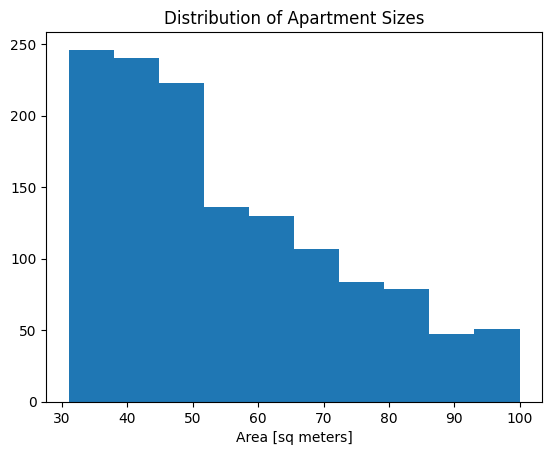

In [69]:
#EXPLORE RELATIONSIP BETWEEN PRICE AND SIZE OF PROPERTY
plt.hist(df['surface_covered_in_m2'])
plt.xlabel('Area [sq meters]')
plt.title('Distribution of Apartment Sizes');